In [1]:
import itertools
import numpy as np
from lattice2d_linear_env import Lattice2DLinearEnv

In [2]:
def optimal_policy(state, env):
    # state is a tuple 
    # Returns the next actions needed (0, 1, 2, 3) and the best reward.
    n = len(state)
    best, end = -2 * len(env.seq), 0
    terminal_states = list(itertools.product(range(3), repeat = len(env.seq) - 2 - n))
    for i in terminal_states:
        s = env.states_dic[state + i]
        if env.P[s][0][1] > best:
            best = env.P[s][0][1]
            end = s
    pol = list(env.states_dic.keys())[list(env.states_dic.values()).index(end)][n:]
    
    # Render the policy
    env.reset()
    action = 0
    env.step(0)
    for a in state:
        action = (3 * action + a) % 4
        env.step(action)
    env.render()
    actions = ()
    for a in pol:
        action = (3 * action + a) % 4
        env.step(action)
        actions += (action,)
        env.render()
    
    return (best, actions) 

def run_best(env):
    return optimal_policy((), env)

In [3]:
env = Lattice2DLinearEnv("HHPHPHHPPH", dp = True)

C:\Users\binyu\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Your agent was trapped! Ending the episode.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(4, (1, 3, 1, 3, 2, 3, 2, 0))

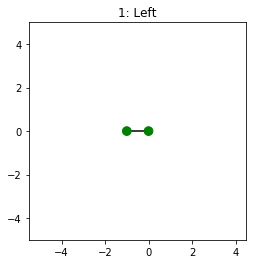

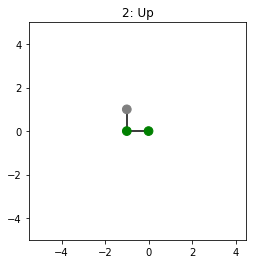

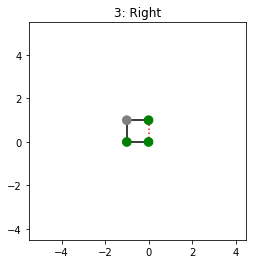

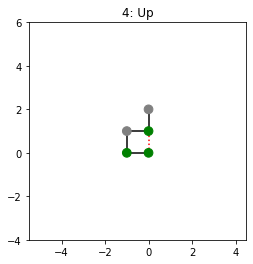

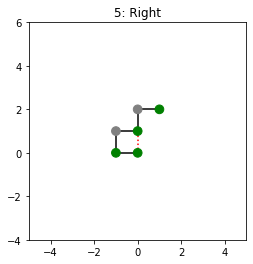

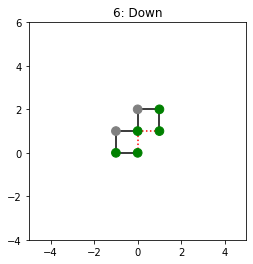

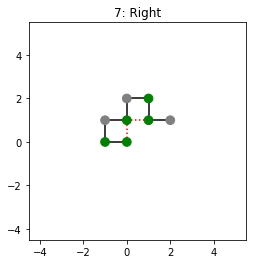

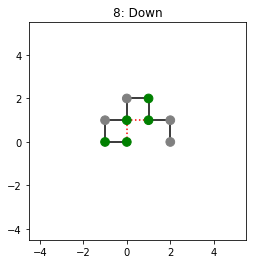

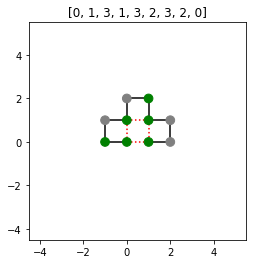

In [4]:
run_best(env)

In [3]:
"""
def value_iteration(env, theta=0.0001, discount_factor=1.0, max_iter = 10000):
    
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        max_iter: Maximum iterations
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.
    
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            next_state, reward, done = env.P[state][a]
            A[a] += reward + discount_factor * V[next_state]
        return A
    
    V = np.zeros(env.nS)
    for i in range(max_iter):
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(env.nS - 3**(len(env.seq) - 2)):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value        
        # Check if we can stop 
        if delta < theta:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0
    
    return policy, V
"""

In [4]:
'''
def run_policy(env, policy):
    state = env.reset()
    curr = 0
    trajectory = ()
    action = 0
    next_state, reward, done, info = env.step(action)
    env.render()
    state=next_state
    for i in range(len(env.seq) - 2):
        direction = np.where(policy[curr] == 1.0)[0][0]
        action = (3 * action + direction) % 4
        next_state, reward, done, info = env.step(action)
        env.render()
        state=next_state
        trajectory += (direction,)
        curr = env.states_dic[trajectory]
        if done:
            print("Reward: {} | Actions: {}".format(reward, info['actions']))
            break
'''

In [ ]:
'''
policy, v = value_iteration(env)
run_policy(env, policy)
'''